# Experiment 3
## Autoencoder Test

We will quickly see with a random image on how the autoencoder can reproduce an image with the best and latest model we have.

In [17]:
import os
import sys
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device("cpu")
img = "./experiments/samples/sample.jpg"

In [3]:
os.chdir("../")

In [4]:
from models.autoencoder import Autoencoder

In [5]:
encoder_path = "./weights/autoencoder/autoencoder_2025-04-02_03-33-46_val_0.0001.pth"
model = Autoencoder()
model = model.to(device)
model.load_state_dict(torch.load(encoder_path, map_location=device, weights_only=True))

<All keys matched successfully>

In [10]:
im = Image.open(img).convert("RGB")
t = transforms.Compose([
    transforms.ToTensor()
])
im_tensor = t(im)
b = im_tensor.unsqueeze(0)
b = b.to(device)

In [18]:
output = model(b)
output = output.squeeze(0).permute(1, 2, 0)

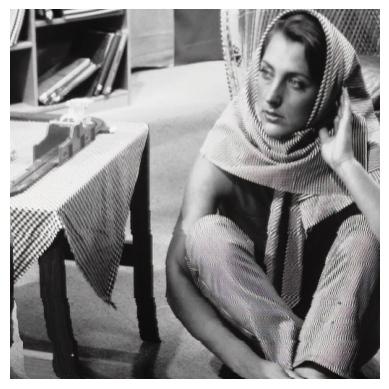

In [19]:
output_np = output.detach().cpu().numpy()
output_np = output_np.clip(0, 1)  # Optional: clamp to [0, 1] if necessary

# Display the image
plt.imshow(output_np)
plt.axis('off')  # Optional: hide axis
plt.show()